<a href="https://colab.research.google.com/github/yeeun0813/baewha/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%9D%91%EC%9A%A94%EC%9B%94_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),           # PyTorch 텐서 변환
    transforms.Normalize((0.5,), (0.5,))  # 정규화 (-1 ~ 1)
])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.84MB/s]


In [ ]:
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 50)  # 입력층 → 은닉층 (50 뉴런)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)     # 은닉층 → 출력층 (10 뉴런)

    def forward(self, x):
        x = x.view(-1, 28*28)  # 2D 이미지 -> 1D 벡터 변환
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # Softmax는 CrossEntropyLoss에서 자동 적용됨
        return x

In [ ]:
model = TwoLayerNet().to(device)
criterion = nn.CrossEntropyLoss() #손실함수: 교차 엔트로피 함수
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 경사하강법

In [ ]:
# 5. 모델 학습
num_epochs = 16
train_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # 테스트 정확도 계산
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_acc = correct / total
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Test Accuracy: {test_acc:.4f}")


Epoch [1/16], Loss: 0.4684, Test Accuracy: 0.9315
Epoch [2/16], Loss: 0.2289, Test Accuracy: 0.9410
Epoch [3/16], Loss: 0.1792, Test Accuracy: 0.9550
Epoch [4/16], Loss: 0.1496, Test Accuracy: 0.9580
Epoch [5/16], Loss: 0.1305, Test Accuracy: 0.9562
Epoch [6/16], Loss: 0.1185, Test Accuracy: 0.9669
Epoch [7/16], Loss: 0.1084, Test Accuracy: 0.9666
Epoch [8/16], Loss: 0.0976, Test Accuracy: 0.9681
Epoch [9/16], Loss: 0.0919, Test Accuracy: 0.9660
Epoch [10/16], Loss: 0.0862, Test Accuracy: 0.9686
Epoch [11/16], Loss: 0.0795, Test Accuracy: 0.9690
Epoch [12/16], Loss: 0.0751, Test Accuracy: 0.9700
Epoch [13/16], Loss: 0.0713, Test Accuracy: 0.9733
Epoch [14/16], Loss: 0.0685, Test Accuracy: 0.9715
Epoch [15/16], Loss: 0.0644, Test Accuracy: 0.9732
Epoch [16/16], Loss: 0.0622, Test Accuracy: 0.9711


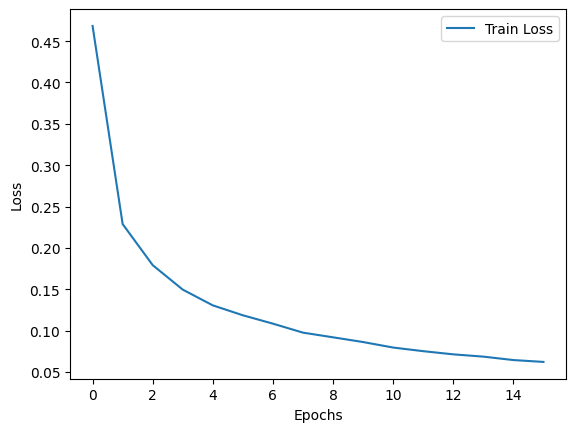

In [ ]:
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

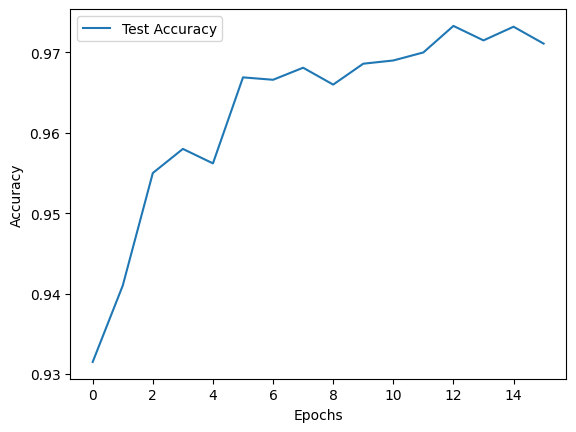

In [ ]:
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
learning_rate = 0.001
batch = 32
epochs = 15

image_size = 32
nb_class = 10

In [ ]:
# transforms 정의하기
transforms = transforms.Compose([transforms.Resize((image_size, image_size)),
                                 transforms.ToTensor()])

# data set 다운받고 생성하기
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms)

# data loader 정의하기
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch,
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=batch,
                          shuffle=False)

In [ ]:
class LeNet5(nn.Module):
    def __init__(self, n_classes):
        super(LeNet5, self).__init__()

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=n_classes),
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

In [ ]:
def get_accuracy(model, data_loader, device):
    correct_pred = 0
    n = 0

    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device)
            y_true = y_true.to(device)

            _, y_prob = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

In [ ]:
def plot_losses(train_losses, valid_losses):
    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss')
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs",
            xlabel='Epoch',
            ylabel='Loss')
    ax.legend()
    fig.show()

    # plot style을 기본값으로 설정
    plt.style.use('default')

In [ ]:
def train(train_loader, model, criterion, optimizer, device):
    model.train()
    running_loss = 0

    for X, y_true in train_loader:

        optimizer.zero_grad()

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

        # 역전파
        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

In [ ]:
def validate(valid_loader, model, criterion, device):
    model.eval()
    running_loss = 0

    for X, y_true in valid_loader:

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파와 손실 기록하기
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)

    return model, epoch_loss


In [ ]:
def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    # metrics를 저장하기 위한 객체 설정
    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # model 학습하기
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):

            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)

    return model, optimizer, (train_losses, valid_losses)

11:37:58 --- Epoch: 0	Train loss: 0.2318	Valid loss: 0.0960	Train accuracy: 97.05	Valid accuracy: 97.18
11:38:24 --- Epoch: 1	Train loss: 0.0827	Valid loss: 0.0699	Train accuracy: 98.14	Valid accuracy: 97.73
11:38:50 --- Epoch: 2	Train loss: 0.0590	Valid loss: 0.0633	Train accuracy: 98.65	Valid accuracy: 97.95
11:39:15 --- Epoch: 3	Train loss: 0.0473	Valid loss: 0.0489	Train accuracy: 99.01	Valid accuracy: 98.39
11:39:41 --- Epoch: 4	Train loss: 0.0388	Valid loss: 0.0469	Train accuracy: 99.14	Valid accuracy: 98.44
11:40:06 --- Epoch: 5	Train loss: 0.0317	Valid loss: 0.0517	Train accuracy: 99.16	Valid accuracy: 98.34
11:40:31 --- Epoch: 6	Train loss: 0.0286	Valid loss: 0.0502	Train accuracy: 99.17	Valid accuracy: 98.36
11:40:56 --- Epoch: 7	Train loss: 0.0233	Valid loss: 0.0425	Train accuracy: 99.50	Valid accuracy: 98.70
11:41:22 --- Epoch: 8	Train loss: 0.0213	Valid loss: 0.0433	Train accuracy: 99.47	Valid accuracy: 98.66
11:41:47 --- Epoch: 9	Train loss: 0.0201	Valid loss: 0.0490	Trai

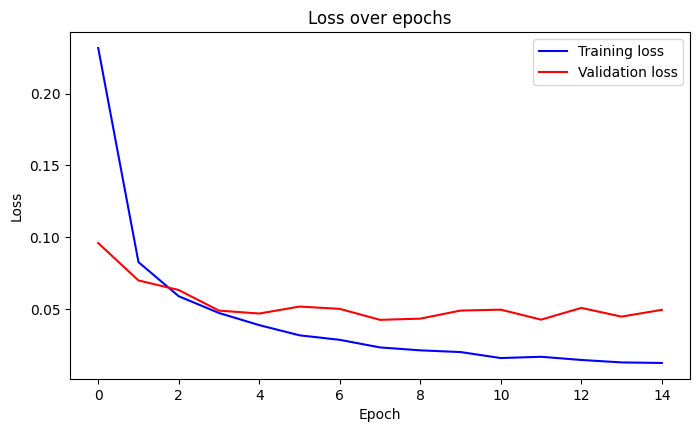

In [ ]:
#RANDOM_SEED = 42
#torch.manual_seed(RANDOM_SEED)

model = LeNet5(nb_class).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()


model, optimizer, _ = training_loop(model, criterion, optimizer, train_loader,
                                    valid_loader, epochs, device)

In [ ]:
#토큰나이저 설치
!pip install sentencepiece
#데이터 직렬화 util 설치
!pip install protobuf
#Hugging face 의 trasnformer 설치
!pip install transformers

In [ ]:
# 예제 이미지 다운로드
!rm -rf ocr_test_image
!mkdir ocr_test_image
#!cd ocr_test_image && wget https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/a01-122-02.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/Hello.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/test_01.png
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/test_02.png


--2025-04-08 10:59:17--  https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/a01-122-02.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/a01-122-02.jpg [following]
--2025-04-08 10:59:17--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/a01-122-02.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13376 (13K) [image/jpeg]
Saving to: ‘a01-122-02.jpg’

a01-122-02.jpg      100%[===================>]  13.06K  --.-KB/s    in 0.001s  

2025-04-08 10:59:17 (18.2 MB/s) - ‘a01-122-02.jpg’ saved [13376/13376]

--2025-04-08 10:59:17-- 

In [ ]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

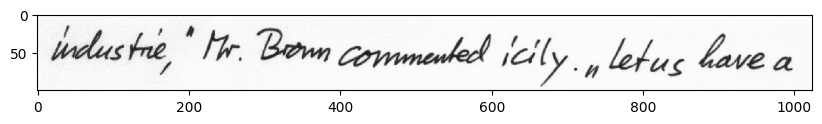

In [ ]:
# Load image
image = Image.open("./ocr_test_image/a01-122-02.jpg").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

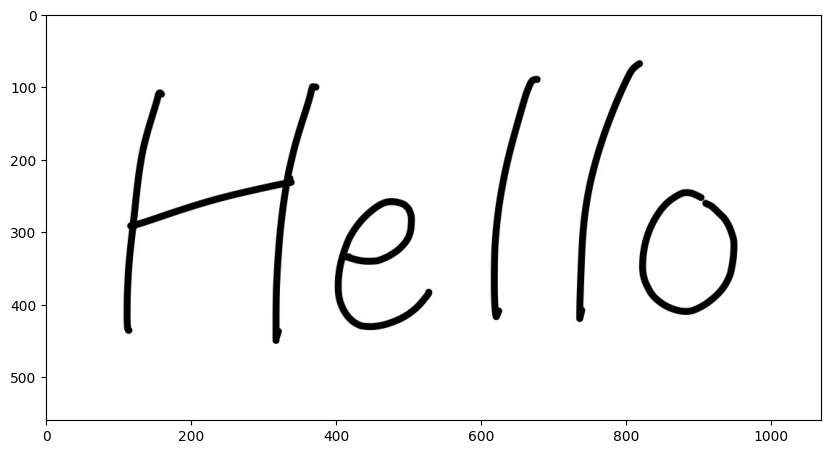

In [ ]:
# Load image
image = Image.open("./ocr_test_image/Hello.jpg").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

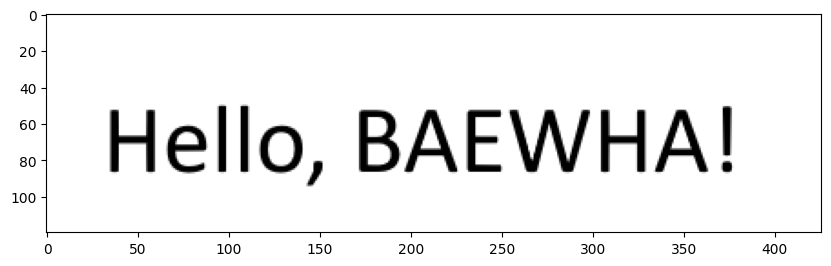

In [ ]:
# Load image
image = Image.open("./ocr_test_image/test_01.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

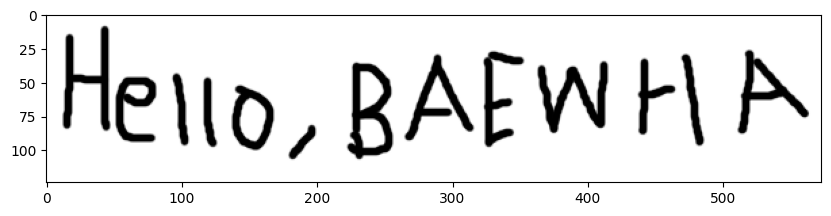

In [ ]:
# Load image
image = Image.open("./ocr_test_image/test_02.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

In [ ]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

[INFO] Load pretrained TrOCRProcessor


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

[INFO] Load pretrained VisionEncoderDecoderModel


config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [ ]:
text_from_image

'industry , " Mr. Brown commented icily . " Let us have a'